In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from random import sample
from skimage.io import imread, imshow
from itertools import chain
import scipy

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [19]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
print('all_xray_df record count: ', len(all_xray_df))
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
print('sample_df record count: ', len(sample_df))
#sample_df.sample(3)

all_xray_df record count:  112120
sample_df record count:  5606


In [57]:
#split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

for c_label in all_labels:
    all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
24376,00006411_023.png,No Finding,23,6411,70,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62177,00015385_000.png,Atelectasis,0,15385,39,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24795,00006514_004.png,Atelectasis,4,6514,46,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


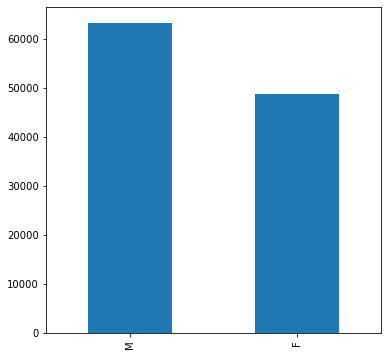

In [4]:
# EDA for patient gender
plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

All Labels (107): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 148, 149, 150, 151, 152, 153, 154, 155, 411, 412, 413, 414]


(array([ 1803.,  5021., 12798., 14580., 18664., 26481., 20790.,  9793.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

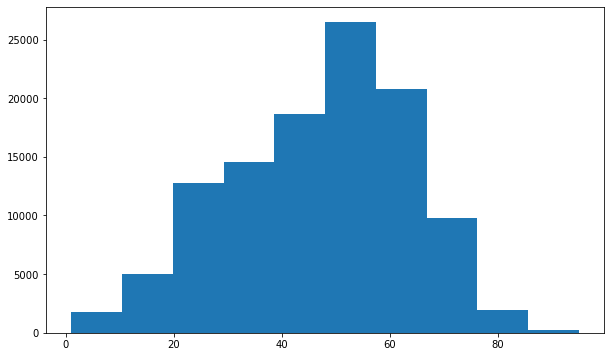

In [5]:
# EDA for patient age
all_ages = np.unique(list(all_xray_df['Patient Age']))
all_ages = [x for x in all_ages if x>0]
print('All Labels ({}): {}'.format(len(all_ages), all_ages))

# We have some invalid records with patient ages greater than 100. Let's filter those out
#unusualAges = all_xray_df[all_xray_df['Patient Age'] > 100]
#len(unusualAges)
#unusualAges.sample(16)

# We have some invalid records with patient ages greater than 100. Let's filter those out
recordsWithValidAges = all_xray_df[all_xray_df['Patient Age'] < 100]
plt.figure(figsize=(10,6))
plt.hist(recordsWithValidAges['Patient Age'])

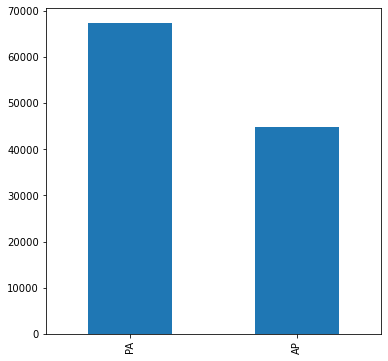

In [6]:
# EDA for patient position
plt.figure(figsize=(6,6))
all_xray_df['View Position'].value_counts().plot(kind='bar')

Atelectasis           10.309490
Cardiomegaly           2.475919
Consolidation          4.162504
Edema                  2.054049
Effusion              11.877453
Emphysema              2.244024
Fibrosis               1.503746
Hernia                 0.202462
Infiltration          17.743489
Mass                   5.156975
No Finding            53.836068
Nodule                 5.646629
Pleural_Thickening     3.019087
Pneumonia              1.276311
Pneumothorax           4.728862
dtype: float64


[Text(0, 0.5, 'Number of Images with Label')]

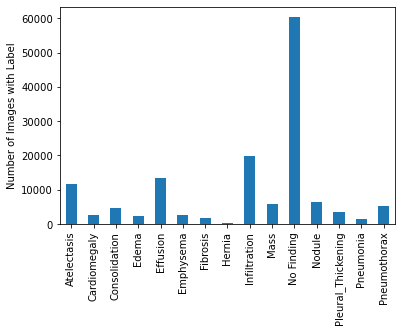

In [7]:
# percentage of cases
labelCases = all_xray_df[all_labels].sum()*100/len(all_xray_df)
print(labelCases)

# plot the number of cases
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

In [8]:
# plot number of pneumonia vs non-pneumonia cases
numberOfPneumoniaCases = len(all_xray_df[all_xray_df.Pneumonia == 1])
numberOfNoFindingCases = len(all_xray_df[all_xray_df['No Finding'] == 1])
numberOfNotPneumoniaCases = len(all_xray_df) - numberOfPneumoniaCases - numberOfNoFindingCases
print("Pneumonia cases: " + str(numberOfPneumoniaCases))
print("No Finding cases: " + str(numberOfNoFindingCases))
print("Non-Pneumonia cases: " + str(numberOfNotPneumoniaCases))
print("Total cases: " + str(len(all_xray_df)))

Pneumonia cases: 1431
No Finding cases: 60361
Non-Pneumonia cases: 50328
Total cases: 112120


Atelectasis            18.308875
Cardiomegaly            2.865129
Consolidation           8.595388
Edema                  23.759609
Effusion               18.798043
Emphysema               1.607268
Fibrosis                0.768693
Hernia                  0.209644
Infiltration           42.278127
Mass                    4.961565
No Finding              0.000000
Nodule                  4.891684
Pleural_Thickening      3.354298
Pneumonia             100.000000
Pneumothorax            2.865129
dtype: float64


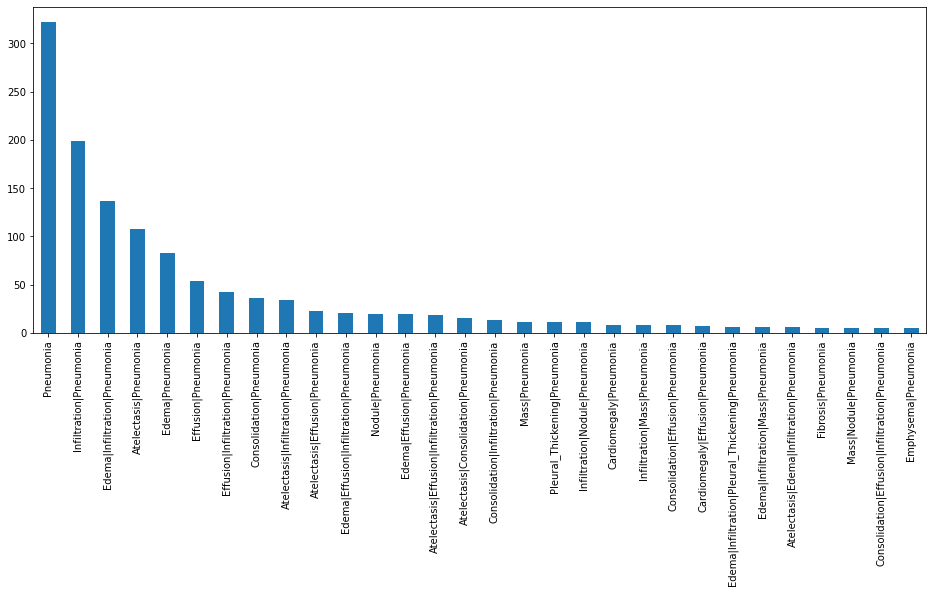

In [9]:
#The distribution of other diseases that are comorbid with pneumonia
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

# percentage of cases
pneumoniaPositiveCases = all_xray_df[all_xray_df.Pneumonia==1]
coMorbidity = pneumoniaPositiveCases[all_labels].sum()*100/len(pneumoniaPositiveCases)
print(coMorbidity)

In [10]:
# number of diseases per patient - step 1
diseaseList = all_labels
diseaseList.remove('No Finding')
diseaseList

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

(array([6.0361e+04, 3.0963e+04, 1.4306e+04, 4.8560e+03, 1.2470e+03,
        3.0100e+02, 6.7000e+01, 1.6000e+01, 1.0000e+00, 2.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

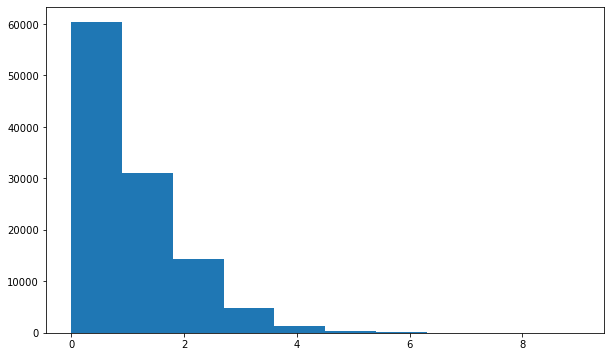

In [11]:
# number of diseases per patient - step 2
all_xray_df['numOfDiseases'] = all_xray_df[diseaseList].sum(axis=1)
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['numOfDiseases'])

In [20]:
imageName = sample_df["Image Index"][0]
#print(imageName)

all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)
sample_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
2698,00013613_027.png,Effusion,27,13613,048Y,F,AP,2500,2048,0.168,0.168,/data/images_006/images/00013613_027.png
2127,00010953_011.png,Atelectasis|Effusion,11,10953,057Y,F,PA,2992,2991,0.143,0.143,/data/images_005/images/00010953_011.png
3635,00017915_000.png,No Finding,0,17915,049Y,M,AP,2500,2048,0.168,0.168,/data/images_008/images/00017915_000.png


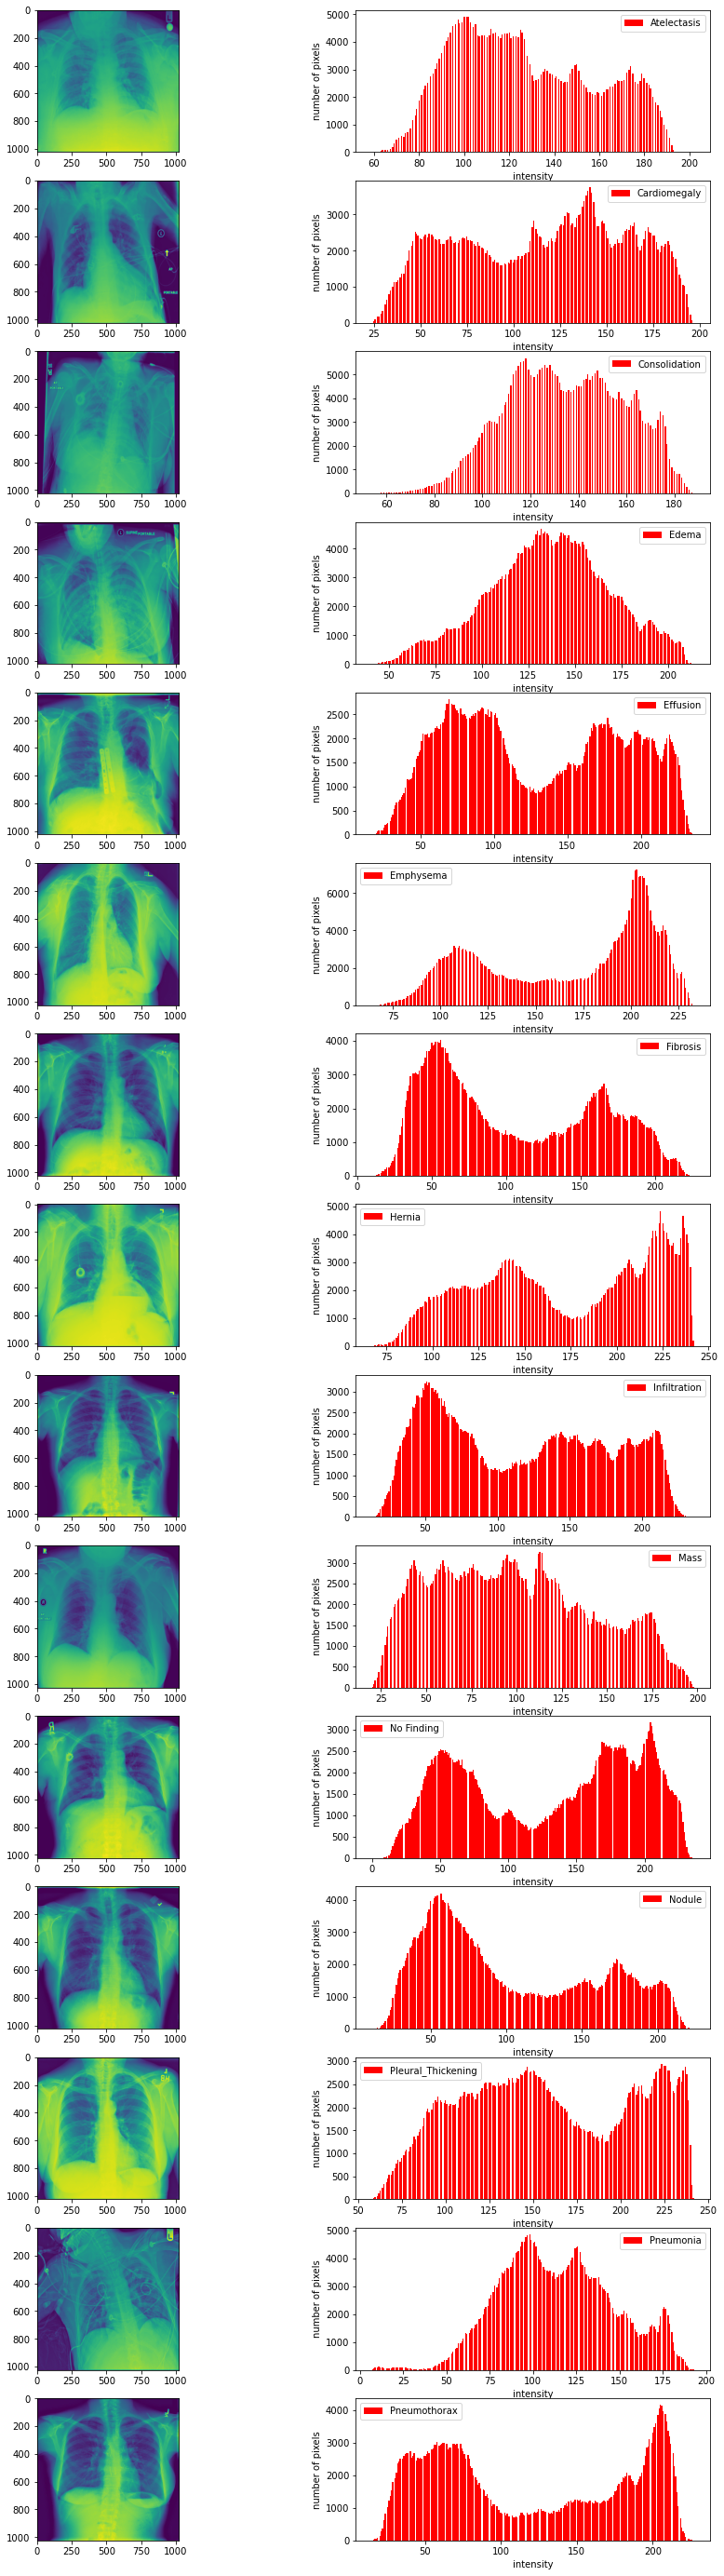

In [68]:
# Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) 
# and compare distributions across diseases

Cols = 2
Rows = len(all_labels) 
Tot = Cols*Rows

# Create a Position index
Position = range(1,Tot + 1)

k=-1
fig = plt.figure(figsize=(15,50))
for label in all_labels:
    filteredSample = sample_df[sample_df["Finding Labels"] == label]
    imagePath = filteredSample.sample(1).iloc[0]['path']

    k = k + 1
    chest_xray_1 = imread(imagePath)
    ax1 = fig.add_subplot(Rows,Cols,Position[k])
    ax1.imshow(chest_xray_1)

    lung_x = [200,800]
    lung_y = [200,800]

    k = k + 1
    ax2 = fig.add_subplot(Rows,Cols,Position[k])
    #plt.figure(figsize=(5,5))
    ax2.hist(chest_xray_1[lung_y[0]:lung_y[1], lung_x[0]:lung_x[1]].ravel(), bins = 256, color='red')
    ax2.legend([label])
    ax2.set_xlabel('intensity')
    ax2.set_ylabel('number of pixels')

plt.show()